In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")

from model import Model, model_from_file
from model_plot import model_plot
from norms import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
eps_0 = 2.6 * 8.85e-12
Gamma = 2.6 * 3.12228e-10

In [3]:
model_dir = 'data/'

## Проверка сходимости по равномерной норме

In [4]:
model_m4 = model_from_file(model_dir + 'model_-4.csv')
model_m3 = model_from_file(model_dir + 'model_-3.csv')
model_m2 = model_from_file(model_dir + 'model_-2.csv')
model_m1 = model_from_file(model_dir + 'model_-1.csv')
model_0 = model_from_file(model_dir + 'model_0.csv')
model_1 = model_from_file(model_dir + 'model_1.csv')
model_2 = model_from_file(model_dir + 'model_2.csv')
model_3 = model_from_file(model_dir + 'model_3.csv')
model_4 = model_from_file(model_dir + 'model_4.csv')

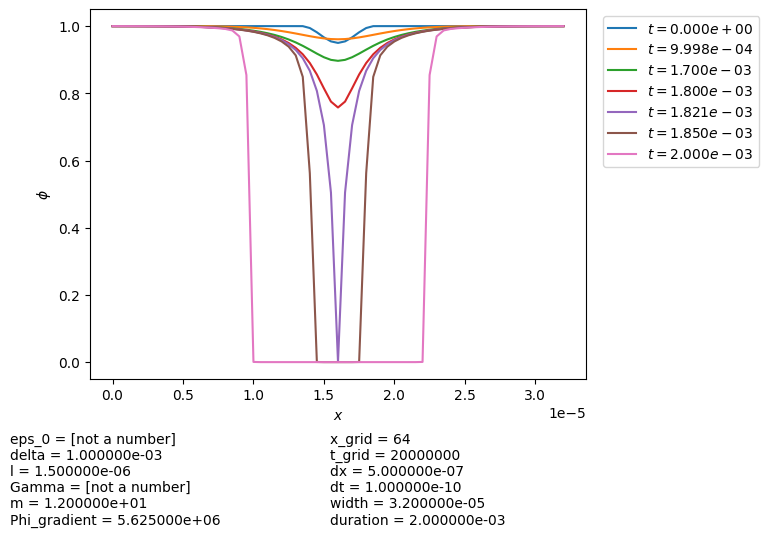

In [5]:
model_plot(model_0, [0, 1e-3, 1.7e-3, 1.8e-3, 1.821e-3, 1.85e-3, 2e-3])

In [6]:
model_0._t_iterations

array([   1, 4096, 4096, ..., 4096, 4096, 4096])

In [7]:
def stability_limits(model):
    limit_delta = \
        0.25 / model.params['m'] * \
        model.params['delta']**(5/3) / \
        (model.params['Phi_gradient']**2 * eps_0)
    limit_h = \
        0.25 / model.params['m'] * \
        model.params['dx']**2 / Gamma
    return limit_delta, limit_h

In [8]:
limit_delta, limit_h = stability_limits(model_0)
limit_delta, limit_h

(2.861522007786915e-10, 6.415840758052218e-06)

In [9]:
def metric_uniform(model_first, model_second):
    return np.abs((model_first.df_phi - model_second.df_phi).to_numpy()).max()

In [10]:
models = [model_m4, model_m3, model_m2, model_m1, model_0, model_1, model_2, model_3, model_4]
dts = [model.params['dt'] for model in models]
norms = [metric_uniform(models[-1], model) for model in models]

In [11]:
norms

[np.float64(1.992808986),
 np.float64(7.643206622999999),
 np.float64(0.029511891000000012),
 np.float64(0.017308621999999996),
 np.float64(0.009381856999999993),
 np.float64(0.004680930999999999),
 np.float64(0.0020808660000000145),
 np.float64(0.0007070210000000021),
 np.float64(0.0)]

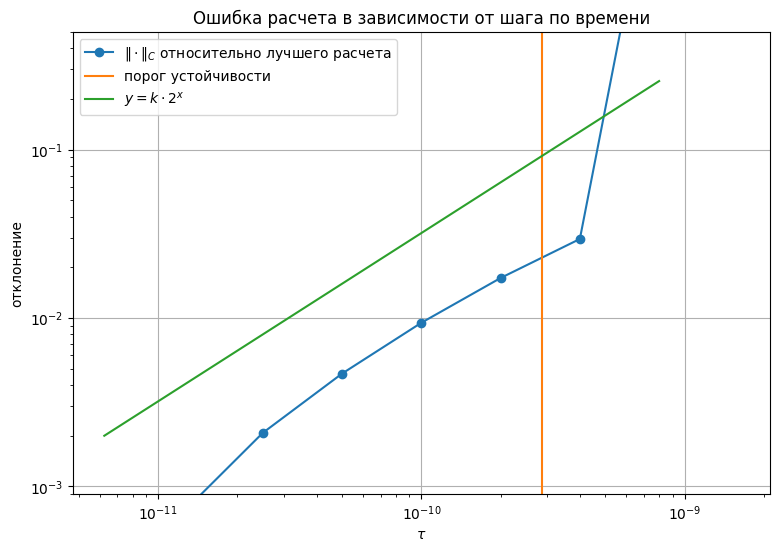

In [12]:
plt.figure(figsize=(9, 6))
plt.title('Ошибка расчета в зависимости от шага по времени')
plt.xlabel(r'$\tau$')
plt.ylabel('отклонение')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.ylim([9e-4, 5e-1])
plt.plot(dts, norms, '-o')
plt.plot([limit_delta, limit_delta], [8e-4, 1e1])
x_0, y_0 = models[-1].params['dt'], 2e-3
plt.plot([x_0, x_0 * 2**7], [y_0, y_0 * 2**7])
plt.legend([
    r'$\| \cdot \|_C$ относительно лучшего расчета',
    'порог устойчивости',
    r'$y = k \cdot 2^x$'
])
plt.show()

### Дальнейшее увеличение шага за счет адаптации

In [13]:
model_m3a = model_from_file(model_dir + 'model_-3a.csv')
model_m4a = model_from_file(model_dir + 'model_-4a.csv')
model_m5a = model_from_file(model_dir + 'model_-5a.csv')
model_m6a = model_from_file(model_dir + 'model_-6a.csv')
model_m7a = model_from_file(model_dir + 'model_-7a.csv')

In [14]:
models_adaptive = [model_m7a, model_m6a, model_m5a, model_m4a, model_m3a]
dts_adaptive = [model.params['dt_max'] for model in models_adaptive]
norms_adaptive = [metric_uniform(models[-1], model) for model in models_adaptive]

In [15]:
norms_adaptive

[np.float64(0.237089969453),
 np.float64(0.181043695758),
 np.float64(0.08400612500000001),
 np.float64(0.06191703700000001),
 np.float64(0.043599762000000014)]

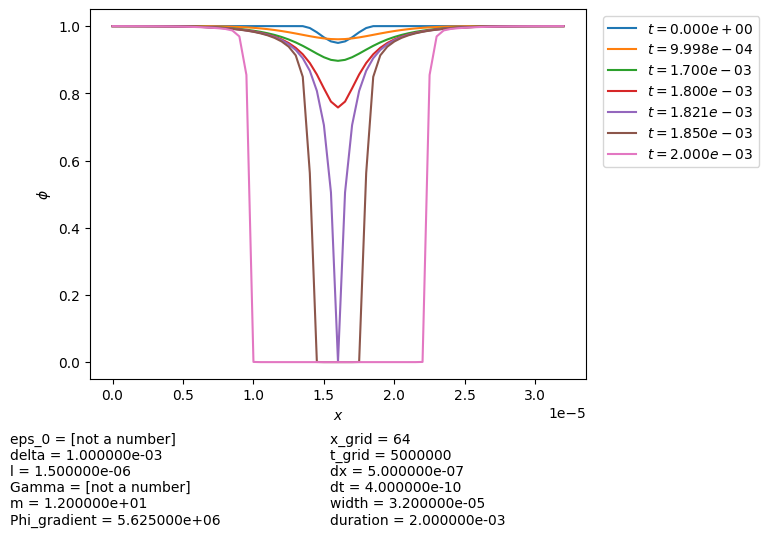

In [16]:
model_plot(model_m4a, [0, 1e-3, 1.7e-3, 1.8e-3, 1.821e-3, 1.85e-3, 2e-3])

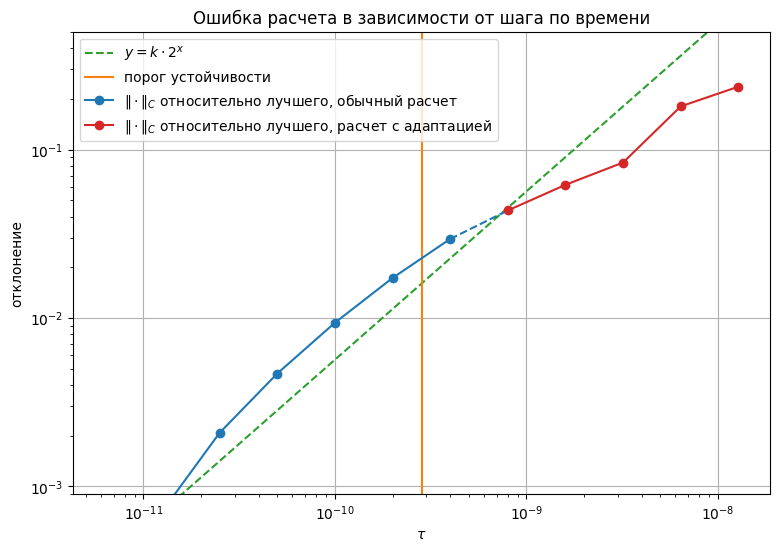

In [17]:
plt.figure(figsize=(9, 6))
plt.title('Ошибка расчета в зависимости от шага по времени')
plt.xlabel(r'$\tau$')
plt.ylabel('отклонение')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.ylim([9e-4, 5e-1])

x_0, y_0 = dts[-2], norms[-2]
plt.plot([x_0, x_0 * 2**10], [y_0, y_0 * 2**10], '--', color='C2')
plt.plot([limit_delta, limit_delta], [8e-4, 1e1], color='C1')

plt.plot([dts[2], dts_adaptive[-1]], [norms[2], norms_adaptive[-1]], '--', color='C0', label='_nolegend_')
plt.plot(dts[2:], norms[2:], '-o')
plt.plot(dts_adaptive, norms_adaptive, '-o', color='C3')

plt.legend([
    r'$y = k \cdot 2^x$',
    'порог устойчивости',
    r'$\| \cdot \|_C$ относительно лучшего, обычный расчет',
    r'$\| \cdot \|_C$ относительно лучшего, расчет с адаптацией',
])

plt.show()

## Падение отдельной точки

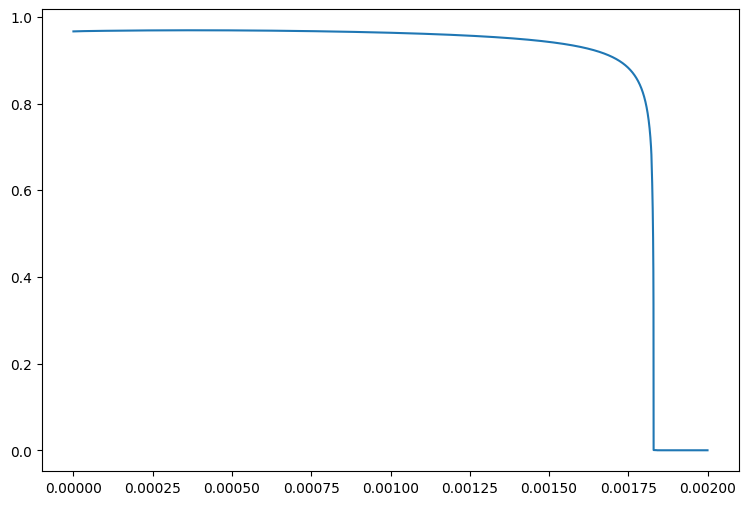

In [18]:
plt.figure(figsize=(9, 6))
plt.plot(model_0.ts, model_0.df_phi[30])
plt.show()

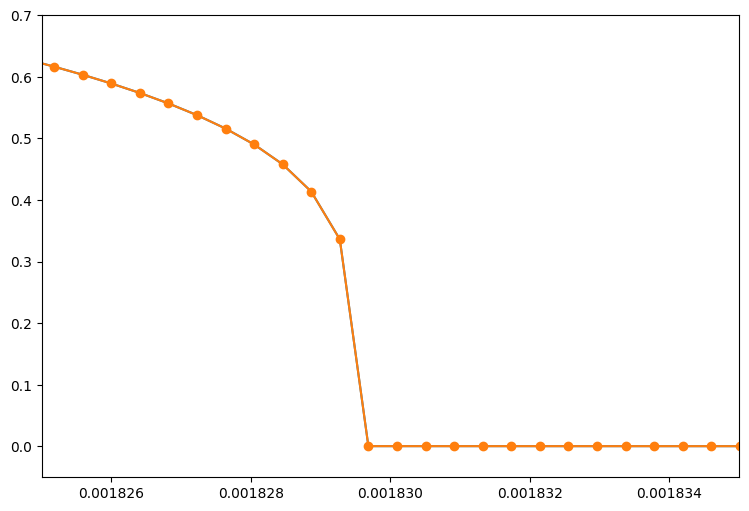

In [19]:
plt.figure(figsize=(9, 6))
plt.xlim([1.825e-3, 1.835e-3])
plt.ylim([-0.05, 0.7])
plt.plot(model_0.ts, model_0.df_phi[30])
plt.plot(model_4.ts, model_4.df_phi[30], '-o')
plt.show()

In [20]:
model_h2 = model_from_file(model_dir + 'model_h2.csv')
model_h4 = model_from_file(model_dir + 'model_h4.csv')

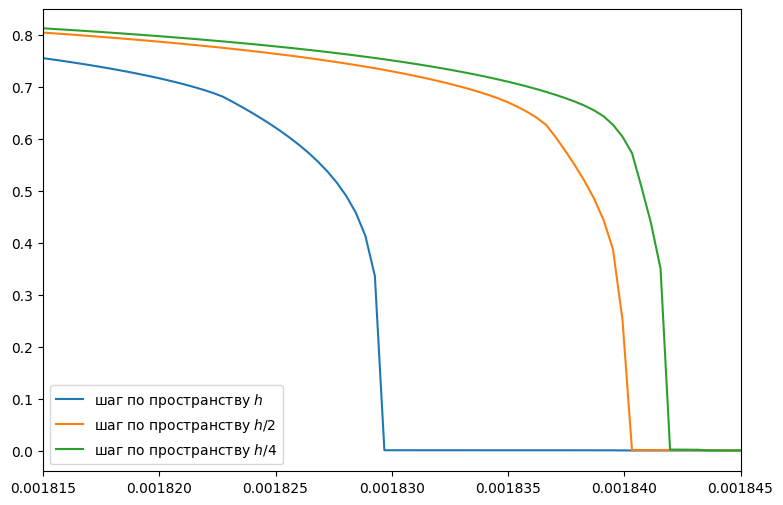

In [34]:
plt.figure(figsize=(9, 6))
plt.xlim([1.815e-3, 1.845e-3])
plt.ylim([-0.04, 0.85])
plt.plot(model_0.ts, model_0.df_phi[30])
plt.plot(model_h2.ts, model_h2.df_phi[30])
plt.plot(model_h4.ts, model_h4.df_phi[30])
plt.legend([
    r'шаг по пространству $h$',
    r'шаг по пространству $h/2$',
    r'шаг по пространству $h/4$'
])
plt.show()

In [35]:
node_fall = model_from_file(model_dir + 'node_fall.csv')

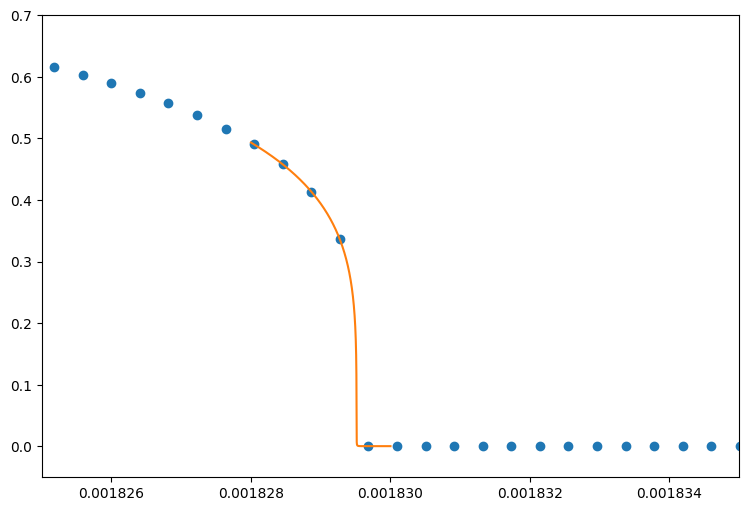

In [36]:
plt.figure(figsize=(9, 6))
plt.xlim([1.825e-3, 1.835e-3])
plt.ylim([-0.05, 0.7])
plt.scatter(model_0.ts, model_0.df_phi[30])
plt.plot(node_fall.ts, node_fall.df_phi[30], color='C1')
plt.show()

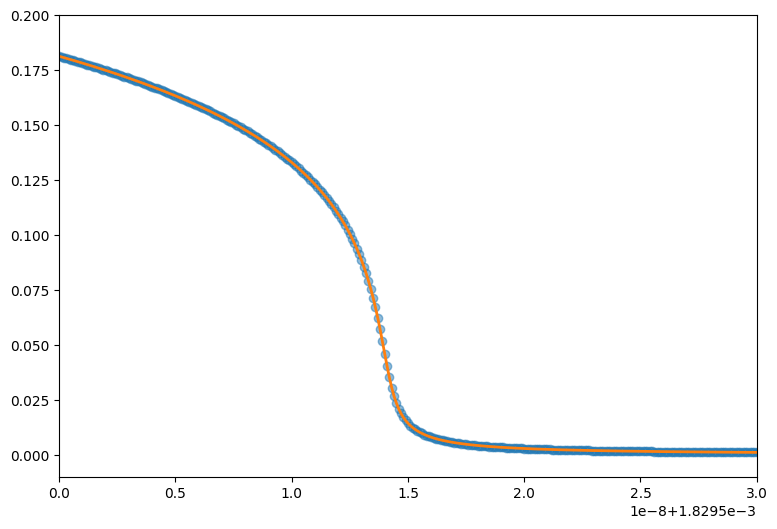

In [37]:
plt.figure(figsize=(9, 6))
plt.xlim([1.8295e-3, 1.82953e-3])
plt.ylim([-0.01, 0.2])
plt.scatter(node_fall.ts, node_fall.df_phi[30], alpha=0.5)
plt.plot(node_fall.ts, node_fall.df_phi[30], color='C1', lw=2)
plt.show()

## Варианты функции $\epsilon(\phi)$

In [38]:
def model_f(phi):
    return 4 * phi**3 - 3 * phi**4

delta = 0.001

def eps_old(phi):
    return 1 / (delta + model_f(phi))

def eps_new(phi):
    return 1 / delta + 1 - 1 / delta * model_f(phi)

def eps_new_alter(phi):
    return 1 / delta * model_f(1 - phi)

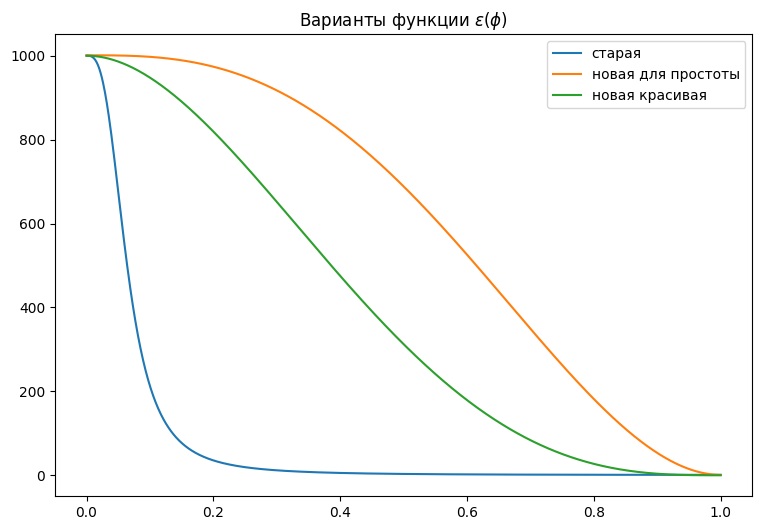

In [39]:
plt.figure(figsize=(9, 6))
plt.title(r'Варианты функции $\epsilon(\phi)$')
phi = np.linspace(0, 1, 1000)
plt.plot(phi, eps_old(phi))
plt.plot(phi, eps_new(phi))
plt.plot(phi, eps_new_alter(phi))
plt.legend(['старая', 'новая для простоты', 'новая красивая'])
plt.show()